In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [11]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
data = load_breast_cancer()
X = data.data
y = data.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Train SVM with Linear and RBF Kernels

In [4]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

Linear SVM

In [5]:
svc_linear = SVC(kernel='linear')
svc_linear.fit(X_train, y_train)
y_pred_linear = svc_linear.predict(X_test)

In [7]:
print("📊 Linear SVM Report")
print(classification_report(y_test, y_pred_linear))
print("Accuracy:", accuracy_score(y_test, y_pred_linear))


📊 Linear SVM Report
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

Accuracy: 0.956140350877193


RBF SVM

In [6]:
svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(X_train, y_train)
y_pred_rbf = svc_rbf.predict(X_test)

In [8]:
print("\n📊 RBF SVM Report")
print(classification_report(y_test, y_pred_rbf))
print("Accuracy:", accuracy_score(y_test, y_pred_rbf))



📊 RBF SVM Report
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Accuracy: 0.9824561403508771


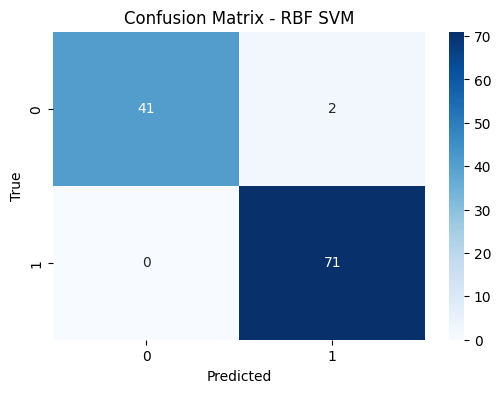

In [12]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rbf), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - RBF SVM")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

*Visualize Decision Boundary (PCA for 2D)*

In [13]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

svm_vis = SVC(kernel='linear')
svm_vis.fit(X_pca, y_train)


SVC(kernel='linear')

In [14]:
def plot_decision_boundary(model, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6,5))
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title(title)
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.show()

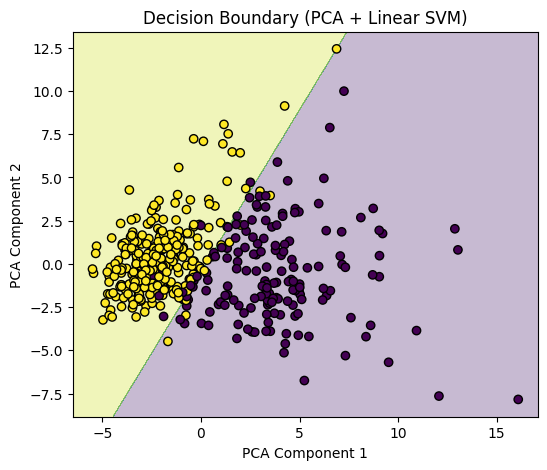

In [15]:
plot_decision_boundary(svm_vis, X_pca, y_train, "Decision Boundary (PCA + Linear SVM)")


## Hyperparameter Tuning (RBF SVM)

In [16]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.1, 1],
    'kernel': ['rbf']
}

In [17]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 0.01, 0.1, 1],
                         'kernel': ['rbf']})

In [18]:
print("✅ Best Parameters:", grid_search.best_params_)

✅ Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


## Evaluate Tuned Model

In [19]:
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

print("\n📈 Tuned RBF SVM Report")
print(classification_report(y_test, y_pred_best))
print("Accuracy:", accuracy_score(y_test, y_pred_best))


📈 Tuned RBF SVM Report
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Accuracy: 0.9824561403508771


Cross-Validation Accuracy

In [20]:
cv_scores = cross_val_score(best_model, X, y, cv=5)
print(f"\n📚 Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


📚 Cross-Validation Accuracy: 0.9122 ± 0.0354
